In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from tqdm import trange


from numba import njit, prange

import datetime
import json
%pip install ipython-autotime
%load_ext autotime

  Obtaining dependency information for ipython-autotime from https://files.pythonhosted.org/packages/d1/6b/c668b9d6a3552eeb4d82c0e6f1e79debc9cfaecc2d59ddb5b2f38c24cdfc/ipython_autotime-0.3.2-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.
time: 344 µs (started: 2023-12-03 23:40:48 +03:00)


In [2]:
def Q(k, dt=0, Theta=1, P=1 ):
          return P *( np.sin( (2 * np.pi) * (k * dt)/ (Theta) ) + 1)


time: 2.06 ms (started: 2023-12-03 23:40:52 +03:00)


In [3]:
def boundary_conditions(k, U):
    """
    Абсолютная теплоизоляция
    """


    U[k,-1,:] = U[k, -2, :]
    U[k, :, -1] = U[k, :, -2]



time: 847 µs (started: 2023-12-03 23:40:53 +03:00)


In [4]:
def heat_source(k, U, ys=0, ye=0, xs=0,xe=0, dt=0, Theta=1, P=1 ):
    cur = (k % 2)
    U[cur, ys:ye, xs:xe] += Q(k, dt=dt, Theta=Theta, P=P) * dt


time: 770 µs (started: 2023-12-03 23:40:54 +03:00)


In [5]:
@njit(parallel = True)
def diffuse_step(cur, U, D=0, dt=0, dx=0, N = 60):

    # g = (dt / dx**2 ) * D[1:-1, 1:-1]


    for i in prange(1, N-1):
      for j in range(1, N-1):

         U[cur, i, j] = U[int(not cur), i, j] + (dt / dx**2 ) * D[i,j] * (U[int(not cur), i+1, j] +
                          U[int(not cur), i-1, j] +
                          U[int(not cur), i, j+1] +
                          U[int(not cur), i, j-1] -
                          4 * U[int(not cur), i, j])

    # U[cur, 1:-1, 1:-1] = U[int(not cur), 1:-1, 1:-1] + g * (
    #     U[int(not cur), 1:-1, 0:-2] +
    #     U[int(not cur), 1:-1, 2:  ] +
    #     U[int(not cur), 0:-2, 1:-1] +
    #     U[int(not cur), 2:,   1:-1] -
    #     4 * U[int(not cur), 1:-1, 1:-1]
    # )

time: 40.5 ms (started: 2023-12-03 23:40:55 +03:00)


In [15]:
def plotheatmap(u_k, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k*dt:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")

  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(u_k, cmap=plt.cm.gnuplot2, vmin=0, vmax=u_k.max())
  plt.colorbar()

  return plt

time: 4.64 ms (started: 2023-12-04 01:07:24 +03:00)


In [7]:
# def animate(k):
#   plotheatmap(U[k], k)



time: 315 µs (started: 2023-12-03 23:40:57 +03:00)


In [8]:
# U = calculate(U)

# plt.title(f"Temperature Map for{N[i]}x{N[i]}")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.pcolormesh(U[-1], cmap='gnuplot2')
# plt.colorbar()

time: 460 µs (started: 2023-12-03 23:40:58 +03:00)


In [9]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=10, frames=1000, repeat=False)
anim.save("heat_equation_solution.gif")

NameError: name 'animate' is not defined

<Figure size 640x480 with 0 Axes>

time: 429 ms (started: 2023-12-03 23:40:59 +03:00)


In [10]:


def main(D_MAPS, U_MAPS, PROB_VALUES):
    N = [60,120,240,480,960]


    Dmax = 1.0
    C = 0.1

    # dt = 0.05


    # Boundary conditions

    # u_top = 0
    u_left = 0
    u_bottom = 0
    # u_right = 0

    for i in range(5):

        nx, тип ny = N[i], N[i]

        dx = N[0]/N[i]

        dt = C * dx**2 / Dmax

        nt = int(600 // dt + 1)


        U = np.zeros((2, ny, nx))

        # граничные условия
        U[:, 0, :] = u_bottom
        U[:, :, 0] = u_left
        # U[:, :, -1] = u_right
        # U[:, -1, : ] = u_top

        D = np.zeros((ny, nx))
        KAPPA = int(N[i]/N[0])
        D.fill(1)

        D[10*KAPPA:30*KAPPA, 10*KAPPA:15*KAPPA] = 0.01
        D[25*KAPPA:30*KAPPA, 10*KAPPA:30*KAPPA] = 0.01
        D[10*KAPPA:15*KAPPA, 20*KAPPA:30*KAPPA] = 0.01
        D[10*KAPPA:30*KAPPA, 25*KAPPA:30*KAPPA] = 0.01

        D_MAPS.append(D)


        P0_ys = 20*KAPPA
        P0_ye = 40*KAPPA
        P0_xs = 5*KAPPA
        P0_xe = 10*KAPPA
        P0 = 100
        Theta0 = 43





        P1_ys = 5*KAPPA
        P1_ye = 10*KAPPA
        P1_xs = 20*KAPPA
        P1_xe = 40*KAPPA
        P1 = 100
        Theta1 = 77


        prob0_y, prob0_x = 20*KAPPA, 20*KAPPA
        prob1_y, prob1_x = 40*KAPPA, 20*KAPPA
        prob2_y, prob2_x = 40*KAPPA, 40*KAPPA
        prob3_y, prob3_x = 20*KAPPA, 40*KAPPA


        DATA = {}

        p0 = []
        p1 = []
        p2 = []
        p3 = []



        now = datetime.datetime.now()

        for k in trange(1, nt):

            prev = k % 2
            cur = (prev + 1) % 2

            heat_source(k, U, ys=P0_ys, ye=P0_ye, xs= P0_xs, xe= P0_xe, dt=dt, Theta=Theta0, P=P0 )
            heat_source(k, U, ys=P1_ys, ye=P1_ye, xs= P1_xs, xe= P1_xe, dt=dt, Theta=Theta1, P=P1 )

            diffuse_step(cur, U, D=D, dt=dt, dx=dx, N=N[i])
            boundary_conditions(cur, U)

            p0.append(U[cur, prob0_y, prob0_x ])
            p1.append(U[cur, prob1_y, prob1_x ])
            p2.append(U[cur, prob2_y, prob2_x ])
            p3.append(U[cur, prob3_y, prob3_x ])





        DATA[0] = p0
        DATA[1] = p1
        DATA[2] = p2
        DATA[3] = p3

        U_MAPS.append(U[-1])
        PROB_VALUES[i] = DATA
        DATA = 0
        U = 0
        D = 0

        end = datetime.datetime.now()

        print(f'EX TIME FOR {N[i]} : {end - now}')

    return [D_MAPS, U_MAPS, PROB_VALUES]




time: 1.96 ms (started: 2023-12-03 23:41:00 +03:00)


In [11]:
D_MAPS = []
U_MAPS = []
PROB_VALUES = {}

time: 602 µs (started: 2023-12-03 23:41:01 +03:00)


In [12]:
data60_240 = main(D_MAPS, U_MAPS, PROB_VALUES)

100%|█████████████████████████████████████| 5999/5999 [00:01<00:00, 4099.42it/s]


EX TIME FOR 60 : 0:00:01.491230


100%|███████████████████████████████████| 23999/23999 [00:02<00:00, 9661.93it/s]


EX TIME FOR 120 : 0:00:02.486303


100%|███████████████████████████████████| 95999/95999 [00:13<00:00, 7037.77it/s]


EX TIME FOR 240 : 0:00:13.642492


100%|█████████████████████████████████| 383999/383999 [02:02<00:00, 3129.27it/s]


EX TIME FOR 480 : 0:02:02.713818


100%|███████████████████████████████| 1535999/1535999 [24:14<00:00, 1055.88it/s]

EX TIME FOR 960 : 0:24:14.717058
time: 26min 34s (started: 2023-12-03 23:41:01 +03:00)


In [13]:
import json
from json import JSONEncoder


class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)



# Serialization


for i in range(3):
  data_to_write = data60_240[i]

  with open(f'DATA_{i}.json', 'w') as file:
    json.dump(data_to_write, file, cls=NumpyArrayEncoder)




time: 9.65 s (started: 2023-12-04 00:07:55 +03:00)


In [14]:
with open('DATA_0.json', 'r') as f:
  D_DATA = json.load(f)

time: 103 ms (started: 2023-12-04 00:08:04 +03:00)


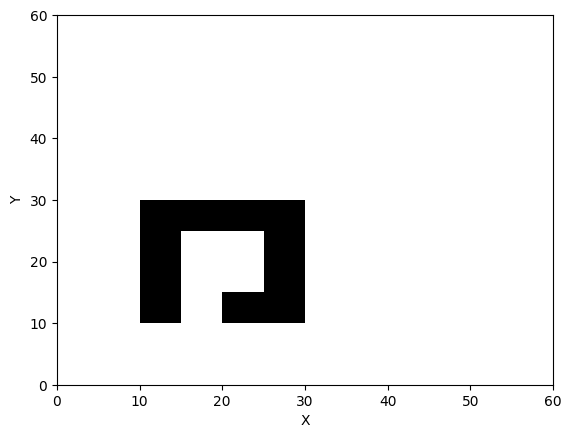

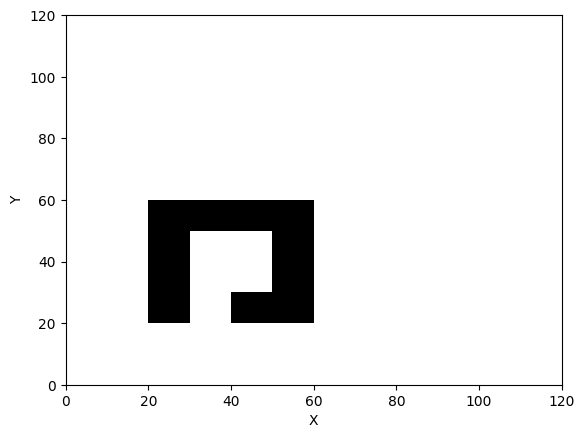

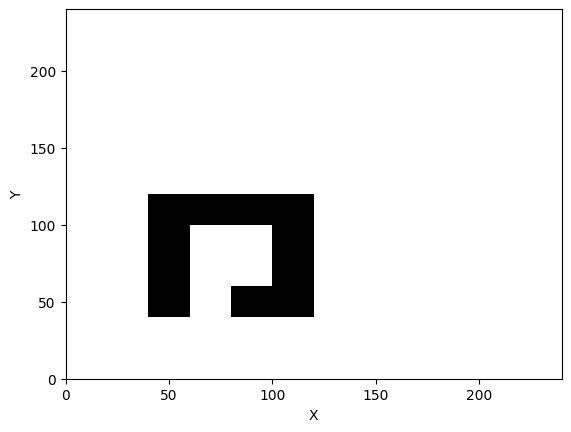

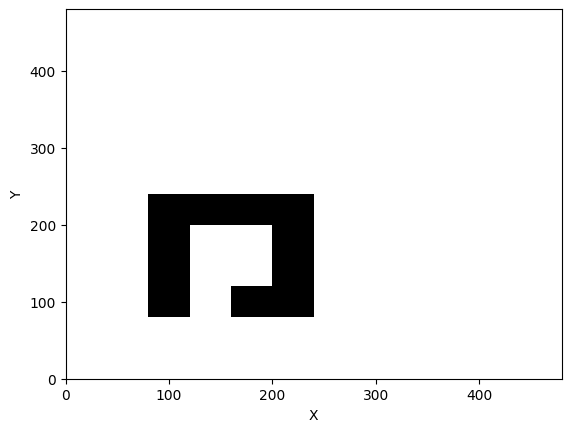

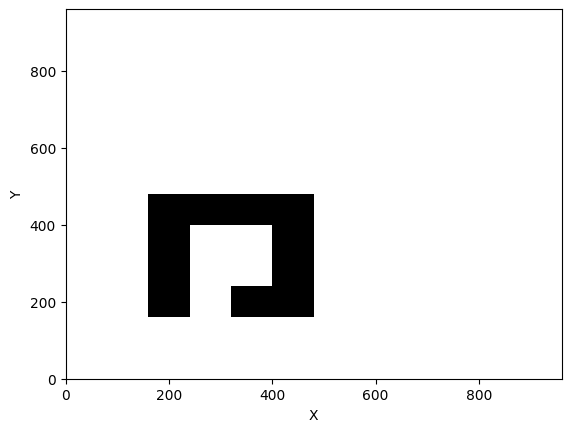

time: 1.71 s (started: 2023-11-24 07:47:10 +00:00)


In [151]:
for i in range(5):
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.pcolormesh(D_DATA[i], cmap='gnuplot2')
  # plt.colorbar()
  plt.show()



In [152]:
with open('DATA_1.json', 'r') as f:
  U_DATA = json.load(f)

time: 1.04 s (started: 2023-11-24 07:48:09 +00:00)


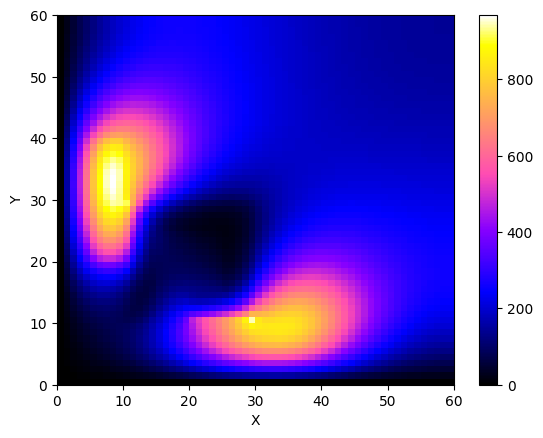

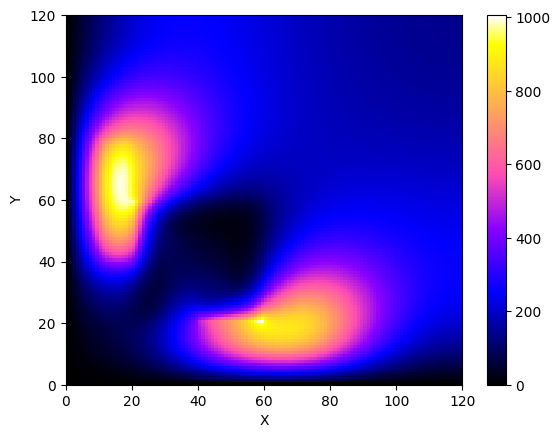

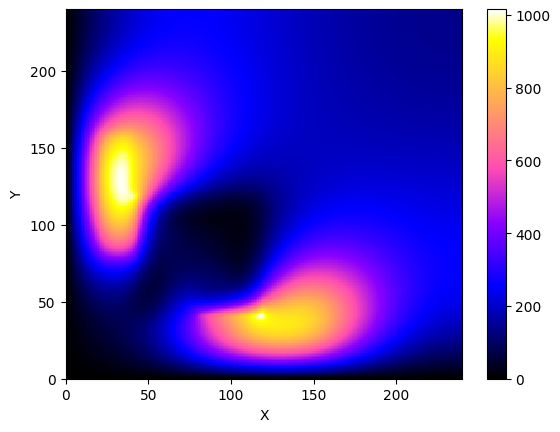

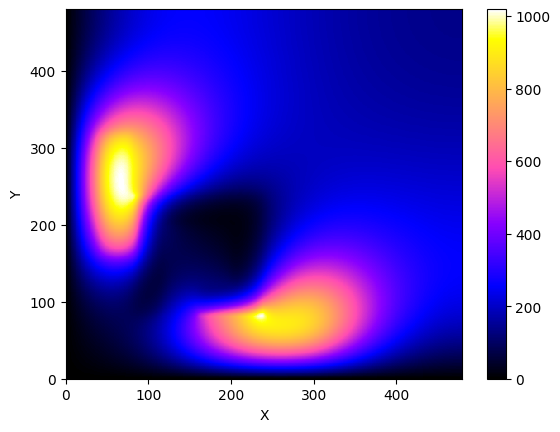

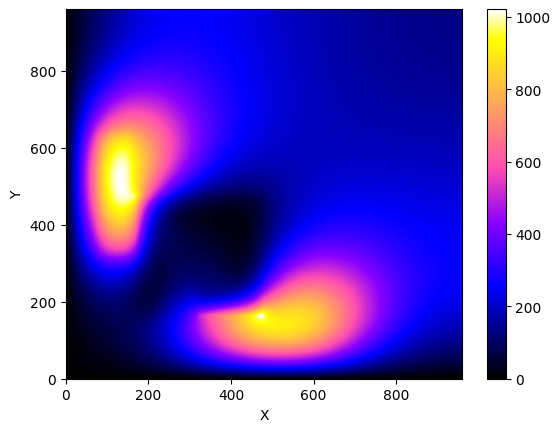

time: 2.69 s (started: 2023-11-24 11:18:22 +00:00)


In [177]:
for i in range(5):
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.pcolormesh(U_DATA[i], cmap='gnuplot2')
  plt.colorbar()
  plt.show()

In [164]:
with open('DATA_2.json', 'r') as f:
  P_DATA = json.load(f)


dict_keys(['0', '1', '2', '3'])

time: 4.24 s (started: 2023-11-24 10:56:30 +00:00)


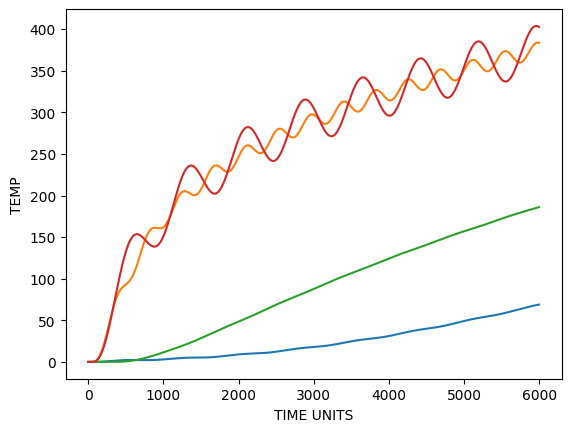

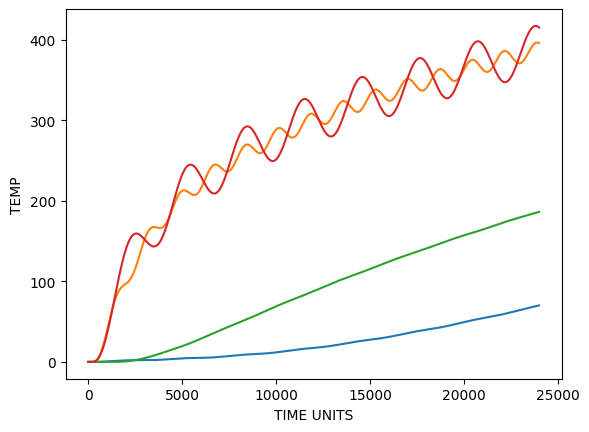

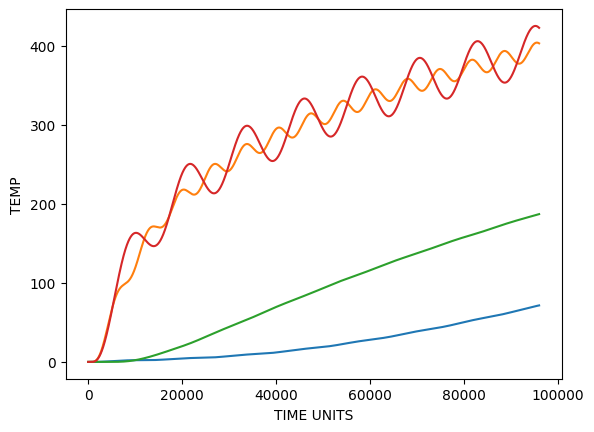

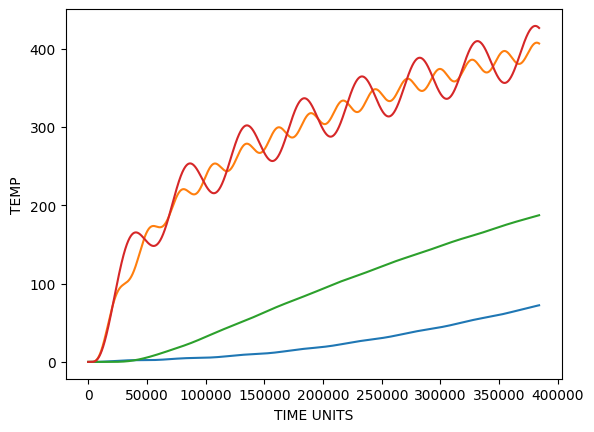

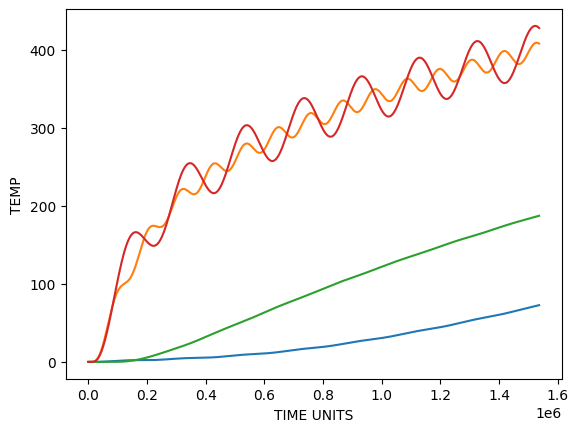

time: 4.66 s (started: 2023-11-24 11:14:46 +00:00)


In [176]:

for i in range(5):

  plt.xlabel("TIME UNITS")
  plt.ylabel("TEMP")




  for j in range(4):
    plt.plot(P_DATA[f'{i}'][f'{j}'])

  plt.show()


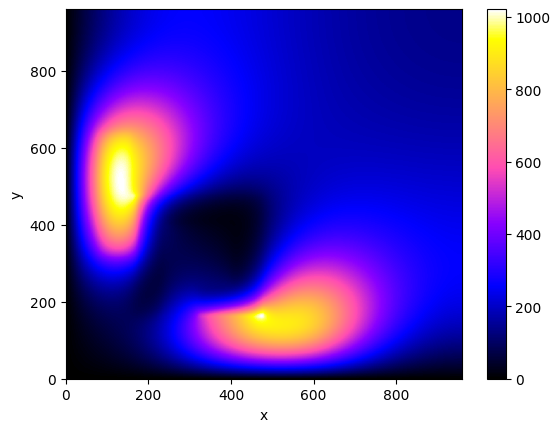

time: 1.69 s (started: 2023-11-24 07:12:28 +00:00)


In [117]:
# plt.title(f"Temperature Map for {N[0]}x{N[0]}")
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh(data60_240[1][4], cmap='gnuplot2')
plt.colorbar()